In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
b = "berlin"
h = "hamburg"
c = "cologne"
s = "stuttgart"
m = "munich"

In [3]:
df = pd.DataFrame.from_dict(
    {
        "start": [b, b, b, b, h, h, h, c, c, s], 
        "end": [h, c, s, m, c, s, m, s, m, m], 
        "distance": [286, 573, 629, 585, 425, 655, 778, 366, 575, 233],
    }
)

In [4]:
df

,start,end,distance
0,berlin,hamburg,286
1,berlin,cologne,573
2,berlin,stuttgart,629
3,berlin,munich,585
4,hamburg,cologne,425
5,hamburg,stuttgart,655
6,hamburg,munich,778
7,cologne,stuttgart,366
8,cologne,munich,575
9,stuttgart,munich,233


In [5]:
df["distance"].min()

233

In [6]:
df.groupby(by="end").agg(sum)

,distance
end,
cologne,998
hamburg,286
munich,2171
stuttgart,1650


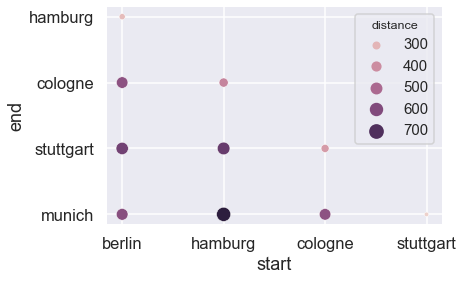

In [7]:
sns.set_theme(context="talk", style="darkgrid")

f, ax = plt.subplots(figsize=(6, 4))
sns.despine(f, left=True, bottom=True)
legend_dict = dict(fontsize="small", title="distance", title_fontsize="x-small")
sns.scatterplot(data=df, x="start", y="end", hue="distance", size="distance", sizes=(20, 200), ax=ax)
plt.legend(**legend_dict)
plt.show()

In [8]:
cities = [b, h, c, s, m]
distance_matrix = np.array([(0, 286, 573, 629, 585), (286, 0, 425, 655, 778), (573, 425, 0, 366, 575), (629, 655, 366, 0, 233), (585, 778, 575, 233 ,0)])
df = pd.DataFrame.from_records(distance_matrix, columns=cities)
df.index = cities

In [9]:
starts = []
ends = []
distances = []


(nrows, ncols) = df.shape
for r in range(nrows):
    for c in range(ncols):
        this_observation = df.iloc[r, c]
        if this_observation not in distances:
            starts.append(df.index[r])
            ends.append(df.columns[c])
            distances.append(this_observation)

tidy_df = pd.DataFrame.from_dict({"start": starts, "end": ends, "distance": distances})

In [10]:
tidy_df

,start,end,distance
0,berlin,berlin,0
1,berlin,hamburg,286
2,berlin,cologne,573
3,berlin,stuttgart,629
4,berlin,munich,585
5,hamburg,cologne,425
6,hamburg,stuttgart,655
7,hamburg,munich,778
8,cologne,stuttgart,366
9,cologne,munich,575
